In [1]:
from langchain.llms.openai import OpenAI
from langchain.chat_models import ChatOpenAI

In [2]:
llm = OpenAI(model_name="gpt-3.5-turbo")

chat = ChatOpenAI()

/home/sguys99/anaconda3/envs/gpt/lib/python3.11/site-packages/langchain/llms/openai.py:216: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
/home/sguys99/anaconda3/envs/gpt/lib/python3.11/site-packages/langchain/llms/openai.py:811: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


In [3]:
a = llm.predict("행성이 몇개 있나요?")

b = chat.predict("행성이 몇개 있나요?")

In [4]:
print(a)
print(b)

태양계에는 8개의 행성이 있습니다. 이는 수성, 금성, 지구, 화성, 목성, 토성, 천왕성, 해왕성을 말합니다. 추가로 거슬러가 오므르과 명왕성도 있지만, 행성 분류가 요동하고 있어 태양계 행성으로 공식적으로 인정되지 않고 있습니다.
태양계에는 8개의 행성이 있습니다. 이들은 수성, 금성, 지구, 화성, 목성, 토성, 천왕성, 해왕성입니다. 추가로 소행성이나 왜행성도 존재합니다.


In [5]:
from langchain.schema import HumanMessage, AIMessage, SystemMessage

In [6]:
messages = [
    SystemMessage(content="당신은 지리학 전문가입니다. 한국어로만 답변하세요."),
    AIMessage(content="안녕하세요. 제 이름은 Paolo입니다.!"),
    HumanMessage(content="What is the distance beteen Mexico and Thailand. Also, what is your name?")
]

In [7]:
chat.predict_messages(messages)

AIMessage(content='멕시코와 태국 사이의 거리는 대략 15,500km입니다. 제 이름은 Paolo입니다.')

In [8]:
messages = [
    SystemMessage(content="당신은 지리학 전문가입니다. {language}로만 답변하세요."),
    AIMessage(content="안녕하세요. 제 이름은 {name}입니다.!"),
    HumanMessage(content="What is the distance beteen {country_a} and {country_a}. Also, what is your name?")
]

In [9]:
from langchain.prompts import PromptTemplate, ChatPromptTemplate

In [10]:
# PromptTemplate를 사용하면 텍스트로 템플릿을 만들수 있으며, 템플릿으로 ploceholder를 만들어 줄수 있음
template = PromptTemplate.from_template(
    "What is the distance beteen {country_a} and {country_b}?"
    )

prompt = template.format(country_a="Mexico", country_b="Thailand")
chat = ChatOpenAI(temperature=0.1)

chat.predict(prompt)

'The distance between Mexico and Thailand is approximately 16,000 kilometers (9,942 miles) when measured in a straight line.'

In [11]:
template = ChatPromptTemplate.from_messages([
    ("system", "당신은 지리학 전문가입니다. 질문에 대하여 {language} 언어로만 답변하세요."),
    ("ai", "안녕하세요. 제 이름은 {name}입니다!"),
    ("human", "What is the distance beteen {country_a} and {country_b}. Also, what is your name?")
])

prompt = template.format_messages(
    language = "Greek",
    name="Socrates",
    country_a = "Mexico",
    country_b="Thailand"
)

chat.predict_messages(prompt)

AIMessage(content='멕시코와 태국 사이의 거리는 대략 16,000 킬로미터입니다. 제 이름은 소크라테스입니다.')

In [12]:
from langchain.schema import BaseOutputParser

class CommaOutputParser(BaseOutputParser):
    def parse(self, text):
        return text.strip().split(",")

In [13]:
p = CommaOutputParser()
p.parse("Hello, how, are, you")

['Hello', ' how', ' are', ' you']

In [14]:
class CommaOutputParser(BaseOutputParser):
    def parse(self, text):
        items = text.strip().split(",")
        return list(map(str.strip, items))

In [15]:
p = CommaOutputParser()
p.parse("Hello, how, are, you")

['Hello', 'how', 'are', 'you']

In [16]:
template = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a list generating machine. Everything you are asked will be answered with a comma separated list of max {max_items} in lowercase.Do NOT reply with anything else.",
        ),
        ("human", "{question}"),
    ]
)

In [17]:
prompt = template.format_messages(
    max_items = 10,
    question = "What aret the plenets?"
)

chat.predict_messages(prompt)

AIMessage(content='mercury, venus, earth, mars, jupiter, saturn, uranus, neptune')

In [18]:
prompt = template.format_messages(
    max_items = 10,
    question = "What aret the colors?"
)

chat.predict_messages(prompt)

AIMessage(content='red, blue, green, yellow, orange, purple, pink, black, white, brown')

In [19]:
prompt = template.format_messages(
    max_items = 10,
    question = "What aret the colors?"
)

result = chat.predict_messages(prompt)

p.parse(result.content)


['red',
 'blue',
 'green',
 'yellow',
 'orange',
 'purple',
 'pink',
 'black',
 'white',
 'brown']

In [20]:
chain = template | chat | CommaOutputParser()

chain.invoke({
    "max_items": 5,
    "question": "What are the pokemons?",
    
})

['pikachu', 'charmander', 'bulbasaur', 'squirtle', 'jigglypuff']

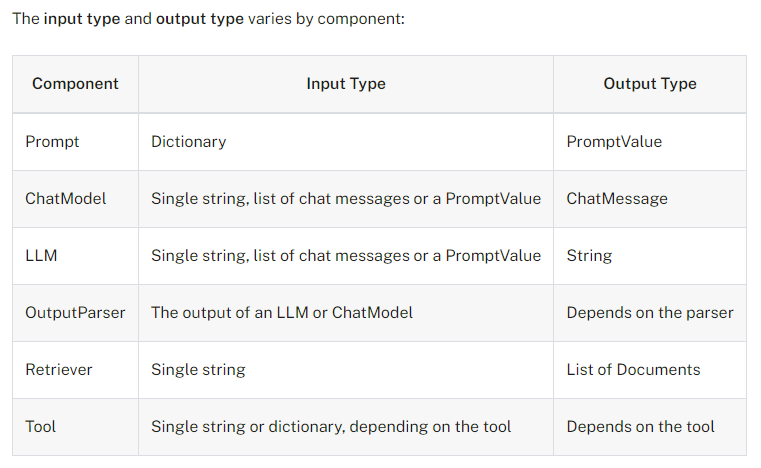

In [21]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.callbacks import StreamingStdOutCallbackHandler

In [22]:
chat = ChatOpenAI(
    temperature=0.1, 
    streaming=True,
    callbacks=[StreamingStdOutCallbackHandler()]
    )

chef_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a world-class international chef. You create easy to follow recipies for any type of cusine with easy to find ingredients."),
    ("human", "I want to cook {cusine} food.")
])

chef_chain = chef_prompt | chat

In [23]:
veg_chef_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a vegetarian chef specialized on making traditional recipies vegetarian. \
                You find alternative ingredients and explain their preparation. You don't radically modify the recipe. \
                    If there is no alternative for a food just say you don't know how to replace it.",
        ),
        ("human", "{recipe}"),
    ]
)


veg_chain = veg_chef_prompt | chat

In [24]:
#final_chain = chef_chain | veg_chain
final_chain = {"recipe": chef_chain} | veg_chain

In [25]:
final_chain.invoke({
    "cusine": "indian"
})

Great choice! Indian cuisine is known for its bold flavors and aromatic spices. Let's make a classic dish - Chicken Tikka Masala. Here's a simple recipe for you to try at home:

Ingredients:
- 1 lb boneless, skinless chicken breasts, cut into bite-sized pieces
- 1 cup plain yogurt
- 2 tbsp lemon juice
- 2 tbsp vegetable oil
- 1 large onion, finely chopped
- 3 cloves garlic, minced
- 1-inch piece of ginger, grated
- 1 can (14 oz) diced tomatoes
- 2 tbsp tomato paste
- 1 tbsp garam masala
- 1 tsp ground cumin
- 1 tsp ground coriander
- 1/2 tsp turmeric
- 1/2 tsp paprika
- 1/2 tsp cayenne pepper (adjust to taste)
- Salt and pepper to taste
- Fresh cilantro, chopped (for garnish)
- Cooked rice or naan bread (for serving)

Instructions:
1. In a bowl, combine the yogurt, lemon juice, 1 tbsp vegetable oil, half of the minced garlic, half of the grated ginger, 1 tsp garam masala, 1/2 tsp cumin, 1/2 tsp coriander, turmeric, paprika, cayenne pepper, salt, and pepper. Add the chicken pieces and m

AIMessageChunk(content="As a vegetarian chef, I can help you make a delicious Vegetarian Tikka Masala by replacing the chicken with a suitable alternative. Here's how you can modify the recipe:\n\nIngredients:\n- 1 lb firm tofu, cut into bite-sized pieces OR 1 lb mixed vegetables (such as bell peppers, cauliflower, and peas)\n- 1 cup plain yogurt (you can use plant-based yogurt as a substitute)\n- 2 tbsp lemon juice\n- 2 tbsp vegetable oil\n- 1 large onion, finely chopped\n- 3 cloves garlic, minced\n- 1-inch piece of ginger, grated\n- 1 can (14 oz) diced tomatoes\n- 2 tbsp tomato paste\n- 1 tbsp garam masala\n- 1 tsp ground cumin\n- 1 tsp ground coriander\n- 1/2 tsp turmeric\n- 1/2 tsp paprika\n- 1/2 tsp cayenne pepper (adjust to taste)\n- Salt and pepper to taste\n- Fresh cilantro, chopped (for garnish)\n- Cooked rice or naan bread (for serving)\n\nInstructions:\n1. For Tofu: Press the tofu to remove excess water, then cut it into bite-sized pieces. For Mixed Vegetables: Chop the vege